In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [72]:
df = pd.read_csv('Amazon Sale Report.csv')
df

<ipython-input-72-f184d23ca18c>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


#Clean data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [74]:
df[df.duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

Cột Courier Status không thể xác định được giá trị của các giá trị null do sự không đồng nhất trong mối tương quan với yếu tố khác.

Cột Status xác định cụ thể tình trạng hàng hoá hơn.

=> Không dùng cột Courier Status

Thông tin tại cột SKU, ASIN, Unnamed: 22,fulfilled-by, index không quan trọng trong quá trình phân tích

=> Không dùng cột SKU, ASIN, Unnamed: 22,fulfilled-by, index

Thông tin tại cột ship-country, currency, Sales Channel chỉ chứa 1 thông tin duy nhất nên không phục vụ nhiều trong quá trình phân tích

=> Không dùng cột ship-country, currency

Thông tin tại cột ship-city, ship-state được thể hiện tại cột ship-postal-code

=> Không dùng cột ship-city, ship-state

In [76]:
df = df.drop(columns  = ['ship-country','currency','Unnamed: 22','SKU','ASIN','promotion-ids','Courier Status', 'ship-city', 'ship-state', 'index','fulfilled-by', 'Sales Channel '])

Do cột Amount và ship-postal-code không có cơ sở để xác định các gía trị null
=> Xoá các giá trị null trong 2 cột này

In [77]:
df.dropna(subset = ['Amount','ship-postal-code'], inplace = True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121149 entries, 0 to 128974
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            121149 non-null  object 
 1   Date                121149 non-null  object 
 2   Status              121149 non-null  object 
 3   Fulfilment          121149 non-null  object 
 4   ship-service-level  121149 non-null  object 
 5   Style               121149 non-null  object 
 6   Category            121149 non-null  object 
 7   Size                121149 non-null  object 
 8   Qty                 121149 non-null  int64  
 9   Amount              121149 non-null  float64
 10  ship-postal-code    121149 non-null  float64
 11  B2B                 121149 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 11.2+ MB


In [79]:
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-79-b9a79a5d1092>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [80]:
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Qty,Amount,ship-postal-code,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,Set,S,0,647.62,400081,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,1,406.00,560085,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,1,329.00,410210,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,Western Dress,L,0,753.33,605008,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,1,574.00,600073,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,1,517.00,500013,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,1,999.00,122004,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,1,690.00,500049,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,1,1199.00,389350,False


In [81]:
df1 = df[df['Qty'] == 0]
df1['Status'].value_counts()

Status
Cancelled    5133
Name: count, dtype: int64

Dữ liệu bất thường ở việc có một số giao dịch có Quantity = 0. Tuy nhiên những đơn này đều có status là cancelled

=> có thể do lỗi hoặc do cancelled lúc vừa đặt hàng nên nhà phân phối chưa kịp chốt số lượng để gửi

In [82]:
df.loc[df['Status'].isin(['Shipped','Shipped - Delivered to Buyer','Shipped - Picked Up']), 'Status'] = 'Shipped'
df.loc[df['Status'].isin(['Cancelled','Shipped - Returned to Seller','Shipped - Rejected by Buyer','Shipped - Returning to Seller']), 'Status']= 'Cancelled'
df.loc[df['Status'].isin(['Pending','Shipped - Damaged','Shipped - Lost in Transit','Shipped - Out for Delivery','Pending - Waiting for Pick Up']), 'Status'] = 'Pending'
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Qty,Amount,ship-postal-code,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,Set,S,0,647.62,400081,False
1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Standard,JNE3781,kurta,3XL,1,406.00,560085,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,1,329.00,410210,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,Western Dress,L,0,753.33,605008,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,1,574.00,600073,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,1,517.00,500013,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,1,999.00,122004,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,1,690.00,500049,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,1,1199.00,389350,False


In [104]:
df.to_csv('Amazon_india_Sales')

#Encoding

In [84]:
df

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Qty,Amount,ship-postal-code,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,Set,S,0,647.62,400081,False
1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Standard,JNE3781,kurta,3XL,1,406.00,560085,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,1,329.00,410210,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,Western Dress,L,0,753.33,605008,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,1,574.00,600073,False
...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,1,517.00,500013,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,1,999.00,122004,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,1,690.00,500049,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,1,1199.00,389350,False


In [85]:
new_df = df.drop(columns = 'Order ID')
new_df

,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Qty,Amount,ship-postal-code,B2B
0,2022-04-30,Cancelled,Merchant,Standard,SET389,Set,S,0,647.62,400081,False
1,2022-04-30,Shipped,Merchant,Standard,JNE3781,kurta,3XL,1,406.00,560085,False
2,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,1,329.00,410210,True
3,2022-04-30,Cancelled,Merchant,Standard,J0341,Western Dress,L,0,753.33,605008,False
4,2022-04-30,Shipped,Amazon,Expedited,JNE3671,Top,3XL,1,574.00,600073,False
...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,Shipped,Amazon,Expedited,JNE3697,kurta,XL,1,517.00,500013,False
128971,2022-05-31,Shipped,Amazon,Expedited,SET401,Set,M,1,999.00,122004,False
128972,2022-05-31,Shipped,Amazon,Expedited,J0157,Western Dress,XXL,1,690.00,500049,False
128973,2022-05-31,Shipped,Amazon,Expedited,J0012,Set,XS,1,1199.00,389350,False


In [86]:
object_col = new_df.select_dtypes(include = 'object').columns.tolist()
object_col

['Status', 'Fulfilment', 'ship-service-level', 'Style', 'Category', 'Size']

In [87]:
label_encode = LabelEncoder()
for i in object_col:
  new_df[i] = label_encode.fit_transform(df[i])

In [88]:
new_df1 = new_df.copy()

In [89]:
new_df1 = new_df1.drop(['Status'],axis =1)

#Correlation

In [90]:
data = new_df1

In [91]:
columns_name = new_df1.columns.tolist()
columns_name

['Date',
 'Fulfilment',
 'ship-service-level',
 'Style',
 'Category',
 'Size',
 'Qty',
 'Amount',
 'ship-postal-code',
 'B2B']

In [92]:
data = pd.DataFrame(data = data, columns= columns_name)

In [93]:
data['Status'] = new_df['Status']

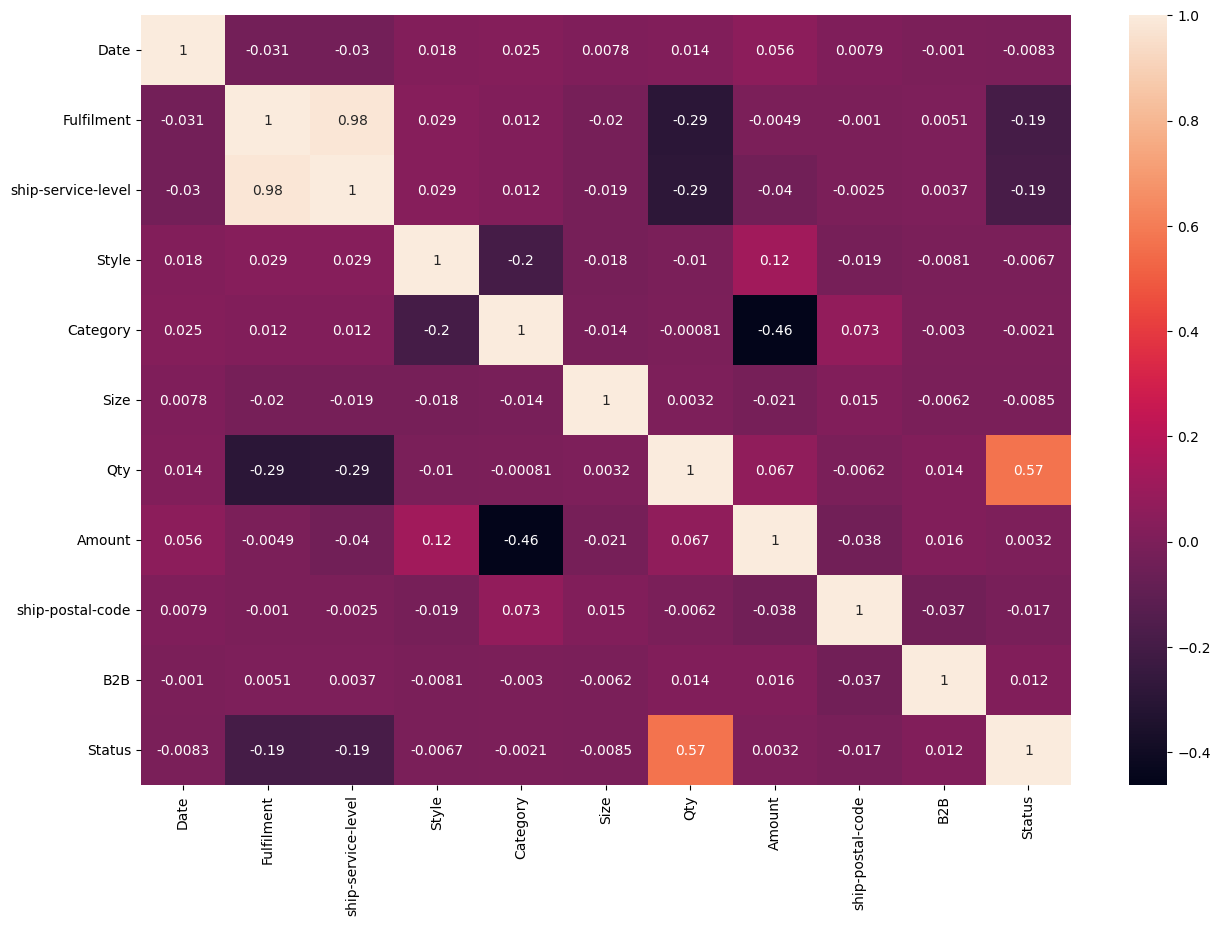

In [94]:
corr = data.corr()
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
heat_map = plt.gcf()
heat_map.set_size_inches(15,10)
plt.show()

Qua corellation trên, đánh giá được 1 số yếu tố ảnh hưởng lớn đến việc đơn hàng có bị cancelled hay không, bao gồm:

Fulfillment

ship-service-level

Qty

#Model

In [95]:
data

,Date,Fulfilment,ship-service-level,Style,Category,Size,Qty,Amount,ship-postal-code,B2B,Status
0,2022-04-30,1,1,1338,5,7,0,647.62,400081,False,0
1,2022-04-30,1,1,845,8,0,1,406.00,560085,False,2
2,2022-04-30,0,0,531,8,8,1,329.00,410210,True,2
3,2022-04-30,1,1,372,7,5,0,753.33,605008,False,0
4,2022-04-30,0,0,752,6,0,1,574.00,600073,False,2
...,...,...,...,...,...,...,...,...,...,...,...
128970,2022-05-31,0,0,772,8,8,1,517.00,500013,False,2
128971,2022-05-31,0,0,1348,5,6,1,999.00,122004,False,2
128972,2022-05-31,0,0,236,7,10,1,690.00,500049,False,2
128973,2022-05-31,0,0,119,5,9,1,1199.00,389350,False,2


In [96]:
data = data[['Fulfilment','ship-service-level','Qty','Status']]
data

,Fulfilment,ship-service-level,Qty,Status
0,1,1,0,0
1,1,1,1,2
2,0,0,1,2
3,1,1,0,0
4,0,0,1,2
...,...,...,...,...
128970,0,0,1,2
128971,0,0,1,2
128972,0,0,1,2
128973,0,0,1,2


In [97]:
X = data.drop(['Status'],axis = 1)
y = data['Status']

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [99]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9297565002063558
Confusion Matrix : 
[[ 1116     0  1499]
 [    0     0   203]
 [    0     0 21412]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2615
           1       0.00      0.00      0.00       203
           2       0.93      1.00      0.96     21412

    accuracy                           0.93     24230
   macro avg       0.64      0.48      0.52     24230
weighted avg       0.93      0.93      0.91     24230



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9297565002063558
Confusion Matrix : 
[[ 1116     0  1499]
 [    0     0   203]
 [    0     0 21412]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2615
           1       0.00      0.00      0.00       203
           2       0.93      1.00      0.96     21412

    accuracy                           0.93     24230
   macro avg       0.64      0.48      0.52     24230
weighted avg       0.93      0.93      0.91     24230



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
#Random Forest
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9297565002063558
Confusion Matrix : 
[[ 1116     0  1499]
 [    0     0   203]
 [    0     0 21412]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2615
           1       0.00      0.00      0.00       203
           2       0.93      1.00      0.96     21412

    accuracy                           0.93     24230
   macro avg       0.64      0.48      0.52     24230
weighted avg       0.93      0.93      0.91     24230



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9297565002063558
Confusion Matrix : 
[[ 1116     0  1499]
 [    0     0   203]
 [    0     0 21412]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2615
           1       0.00      0.00      0.00       203
           2       0.93      1.00      0.96     21412

    accuracy                           0.93     24230
   macro avg       0.64      0.48      0.52     24230
weighted avg       0.93      0.93      0.91     24230



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9297565002063558
Confusion Matrix : 
[[ 1116     0  1499]
 [    0     0   203]
 [    0     0 21412]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      2615
           1       0.00      0.00      0.00       203
           2       0.93      1.00      0.96     21412

    accuracy                           0.93     24230
   macro avg       0.64      0.48      0.52     24230
weighted avg       0.93      0.93      0.91     24230



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
